In [3]:
from msmbuilder.dataset import dataset
from msmbuilder.cluster import KCenters
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np


ModuleNotFoundError: No module named 'msmbuilder'

In [8]:
import glob
dirname='/scratch/gpfs/hsinyu/linfengz/rid/trpcage.run02/'
itername=sorted(glob.glob(dirname+'iter.*'))
allplm=[]
for i in range(30):
    walker='%03d' %i
    eachiter=[]
    for ii in itername:
        plmname=ii+'/00.enhcMD/%s/plm.out' %walker
        data=np.loadtxt(plmname)
        for dd in data:
            eachiter.append(dd[1:])
    allplm.append(eachiter)

In [9]:
allarr=np.array(allplm)

In [10]:
allarr.shape

(30, 92092, 38)

In [30]:
clusterer = KCenters(n_clusters=100)
clustered_trajs = clusterer.fit_transform(allarr)

In [16]:
np.savetxt('clustered_trajs.dat',clustered_trajs)

In [57]:
font_manager.FontProperties?

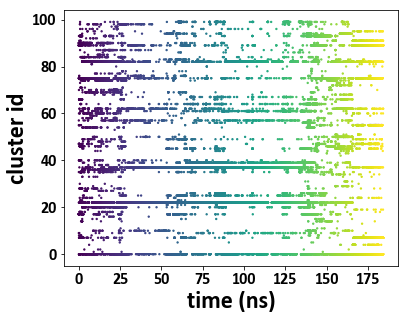

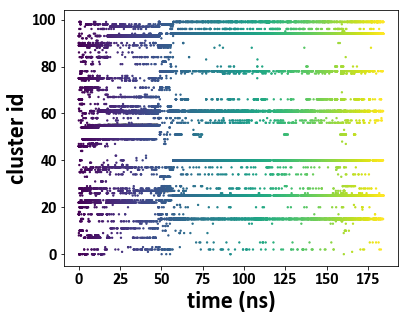

In [32]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)

time = np.arange(len(clustered_trajs[0]))*0.002
#for i in range(len(clustered_trajs)):
for i in [15,16]:
    fig, ax = plt.subplots(figsize=(6,4.7))
    ax.scatter(time,clustered_trajs[i],s=1.8,c=time)
    ax.set_ylabel(r'cluster id',fontproperties=font_prop)
    ax.set_xlabel('time (ns)',fontproperties=font_prop)
    #plt.ylim(0,0.5)
    #plt.xlim(0,180)
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(16)
    plt.savefig('cluster'+str(i)+'.png',dpi=300,bbox_inches='tight')
    plt.show()


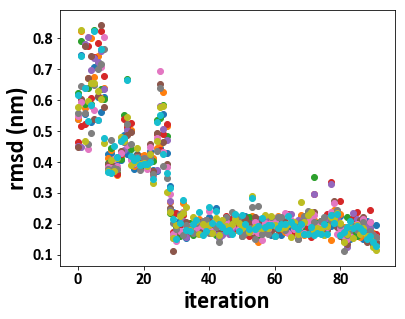

In [37]:
data2=np.loadtxt('/home/dongdong/SCR/trpcage/rmsd.dat2')
time = np.arange(len(data2))
fig, ax = plt.subplots(figsize=(6,4.7))
for i in range(len(data2[0])):
    
    ax.scatter(time,data2[:,i])
ax.set_ylabel(r'rmsd (nm)',fontproperties=font_prop)
ax.set_xlabel('iteration',fontproperties=font_prop)
#plt.ylim(0,0.5)
#plt.xlim(0,180)
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.savefig('cluster'+str(i)+'.png',dpi=300,bbox_inches='tight')
plt.show()

In [58]:
cd /home/dongdong/SCR/trpcage

/scratch/gpfs/dongdong/trpcage


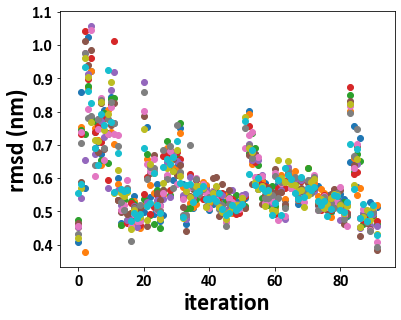

In [64]:
data2=np.loadtxt('/home/dongdong/SCR/trpcage/resrmsd_013.dat')
time = np.arange(len(data2))
fig, ax = plt.subplots(figsize=(6,4.7))
for i in range(len(data2[0])):
    
    ax.scatter(time,data2[:,i])
ax.set_ylabel(r'rmsd (nm)',fontproperties=font_prop)
ax.set_xlabel('iteration',fontproperties=font_prop)
#plt.ylim(0,0.5)
#plt.xlim(0,180)
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.savefig('resrmsd_013.png',dpi=300,bbox_inches='tight')
plt.show()

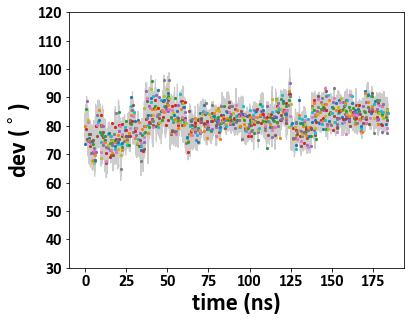

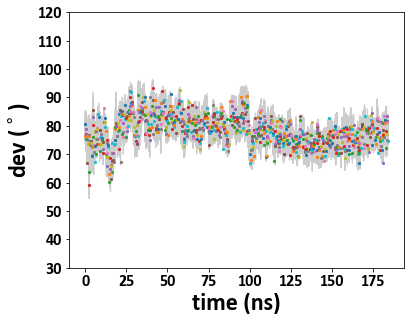

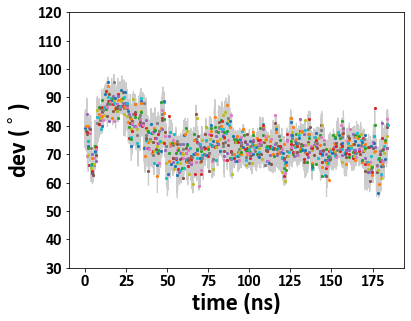

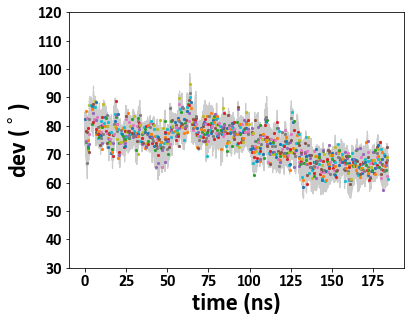

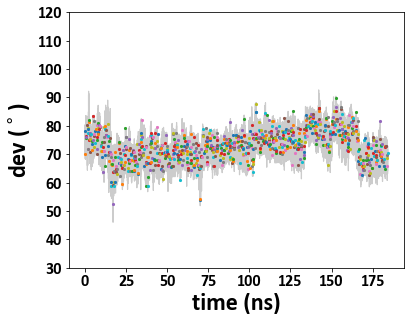

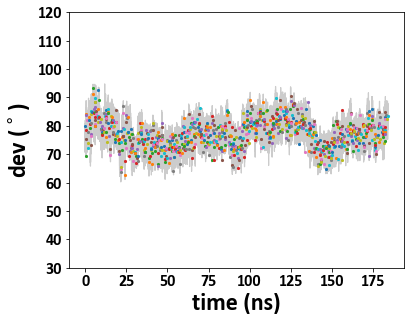

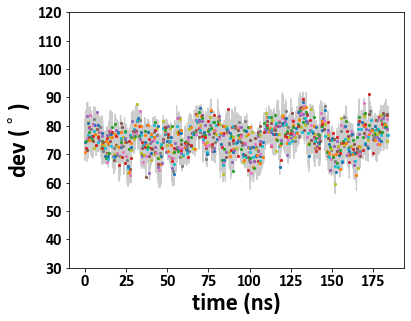

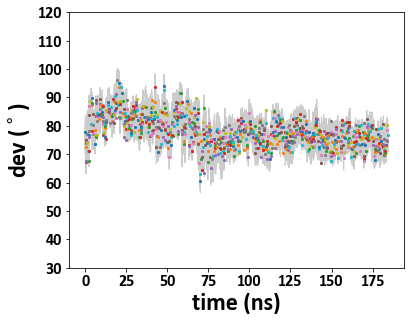

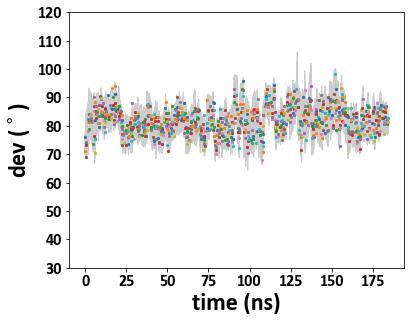

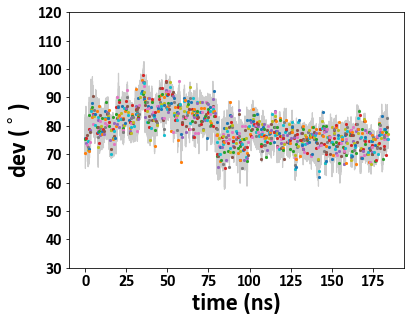

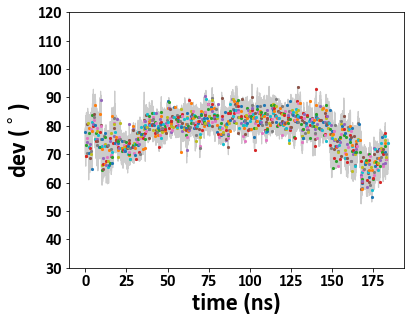

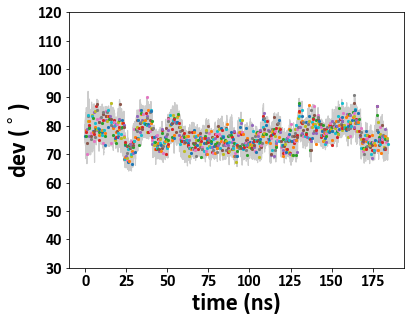

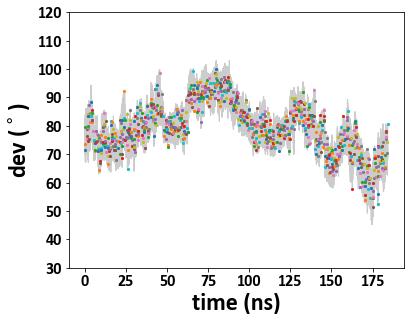

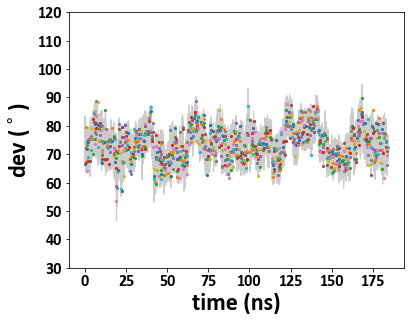

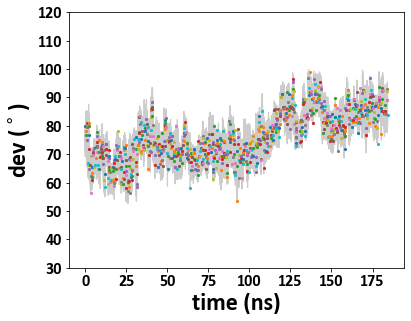

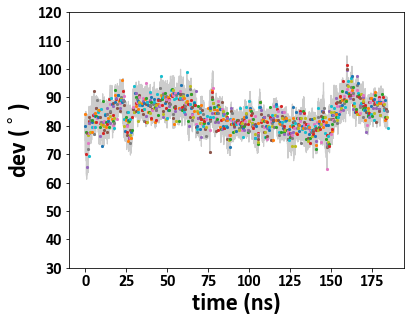

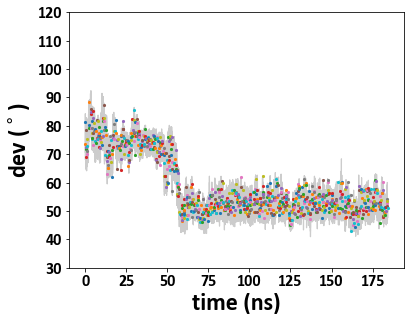

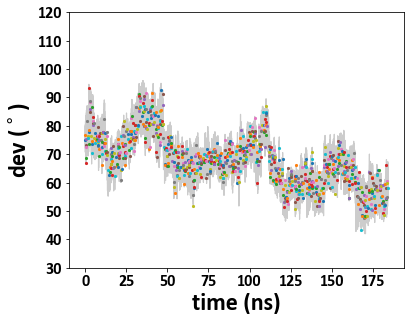

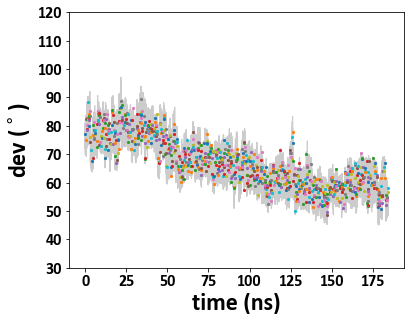

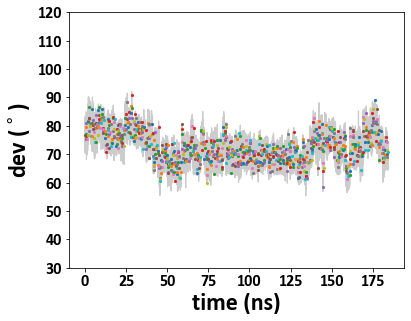

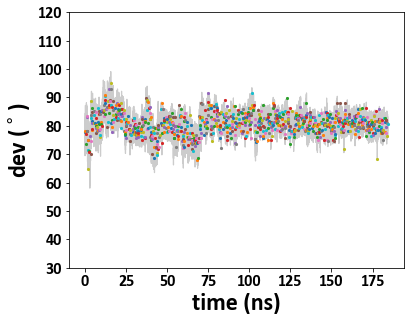

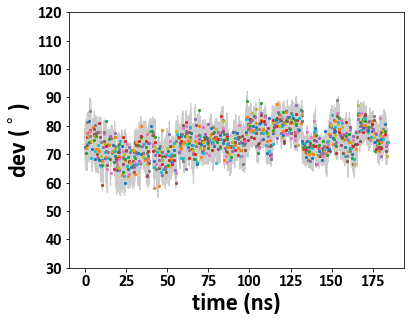

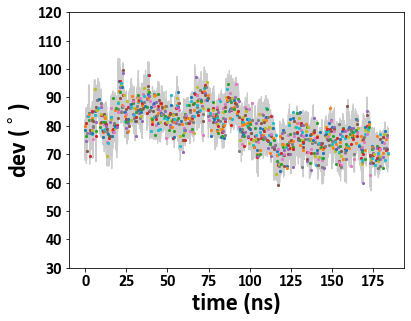

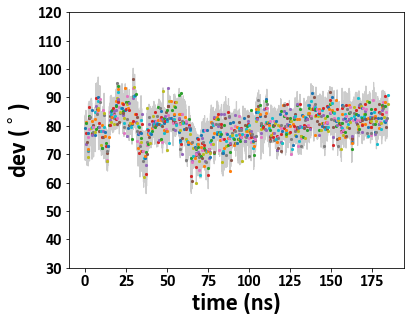

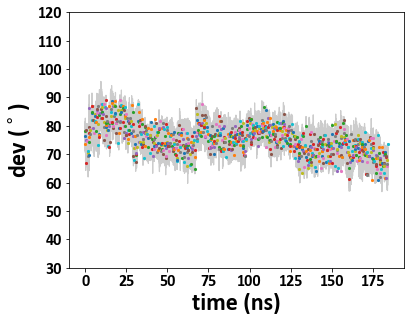

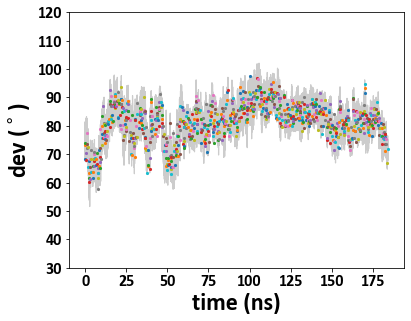

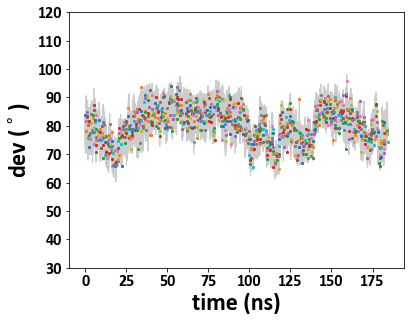

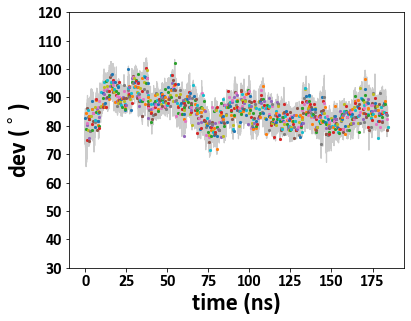

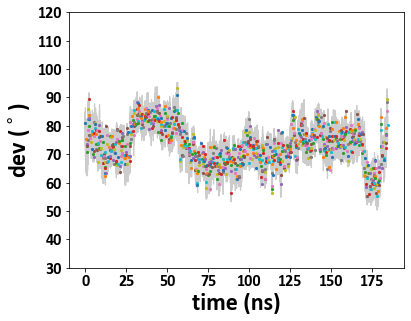

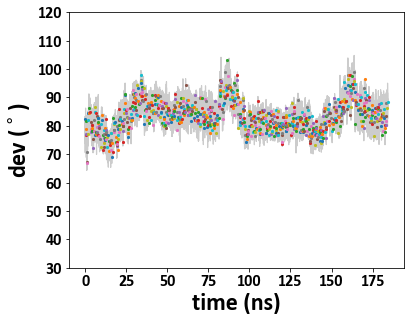

In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np
import glob
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
dirname='/scratch/gpfs/hsinyu/linfengz/rid/trpcage.run02/'
itername=sorted(glob.glob(dirname+'iter.*'))

#for ii in [16]:
for ii in range(30):
    filename='model_dec%03d.dat' %ii
    fig, ax = plt.subplots(figsize=(6,4.7))
    data = np.loadtxt(filename)
    time = np.arange(len(data))*0.002
    ax.plot(time,data,alpha=0.4,lw=1.2,zorder=10,c='gray')
    walker_name='%03d' %ii
    a=0
    for ite in itername:
        index=np.loadtxt(ite+'/00.enhcMD/'+walker_name+'/cls.sel.out')
        for ind in index:
            ax.scatter(time[int(ind+1001*a)],data[int(ind+1001*a)],s=4.5,zorder=20)
        a+=1
    ax.set_ylabel(r'dev ($^\circ$)',fontproperties=font_prop)
    ax.set_xlabel('time (ns)',fontproperties=font_prop)
    plt.ylim(30,120)
    #plt.xlim(0,100)
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(16)
    plt.savefig('model_dec%03d.png' %ii,dpi=300,bbox_inches='tight')
    plt.show()

In [25]:
cd ../dev_run03/

/scratch/gpfs/dongdong/trpcage/analysis/dev_run03


/home/dongdong/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: loadtxt: Empty input file: "/scratch/gpfs/hsinyu/linfengz/rid/trpcage.run03/iter.000032/00.enhcMD/008/cls.sel.out"


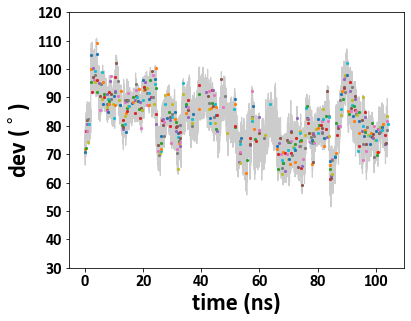

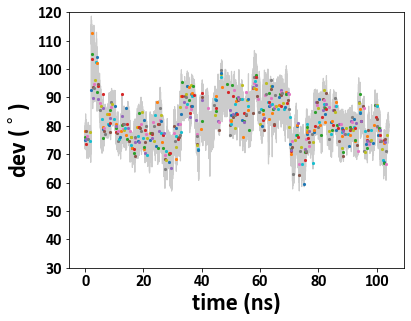

/home/dongdong/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: loadtxt: Empty input file: "/scratch/gpfs/hsinyu/linfengz/rid/trpcage.run03/iter.000019/00.enhcMD/010/cls.sel.out"


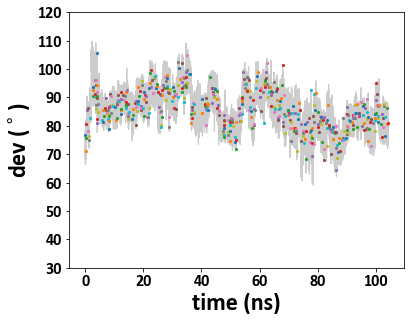

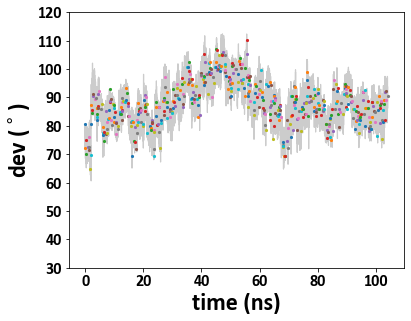

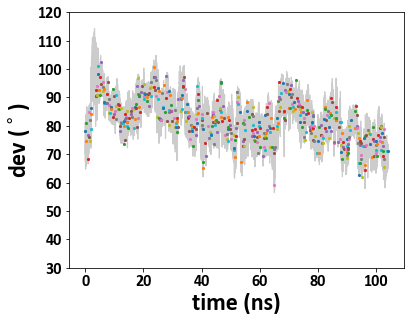

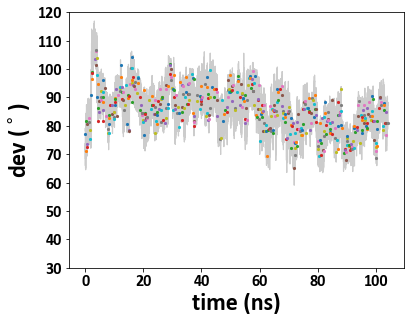

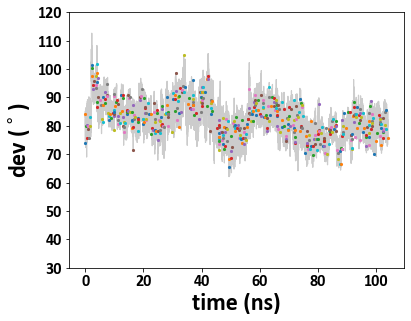

/home/dongdong/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: loadtxt: Empty input file: "/scratch/gpfs/hsinyu/linfengz/rid/trpcage.run03/iter.000027/00.enhcMD/015/cls.sel.out"


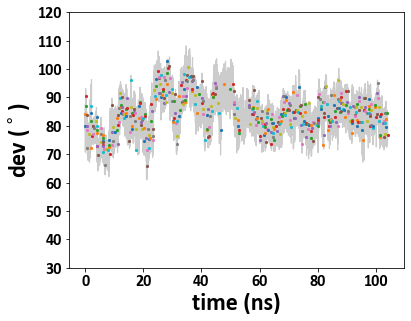

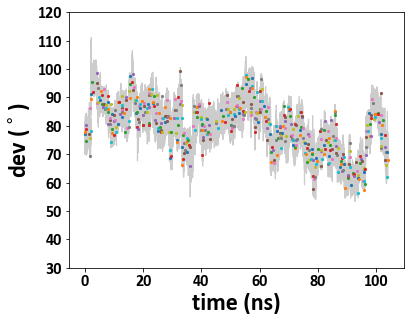

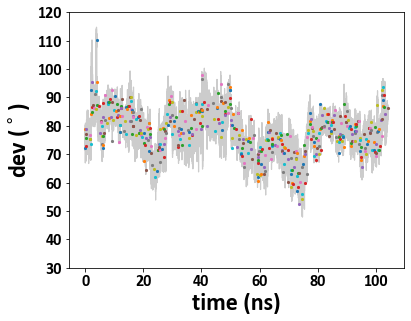

/home/dongdong/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: loadtxt: Empty input file: "/scratch/gpfs/hsinyu/linfengz/rid/trpcage.run03/iter.000001/00.enhcMD/018/cls.sel.out"


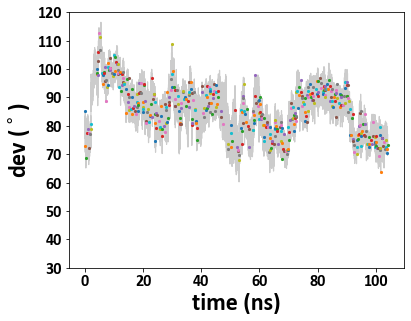

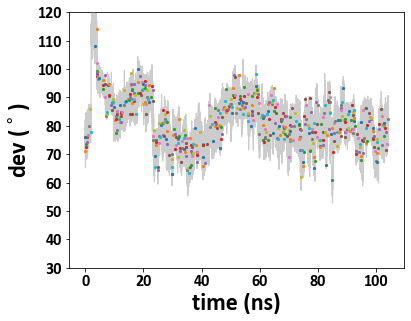

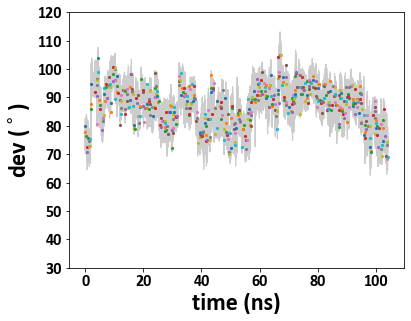

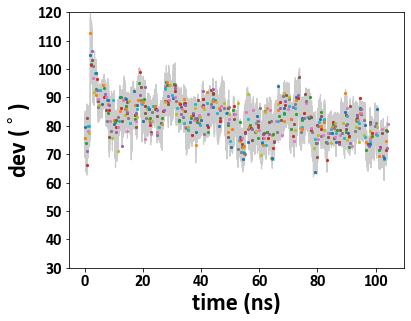

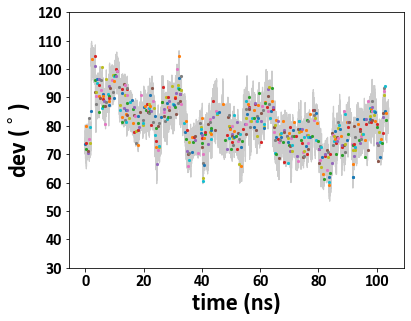

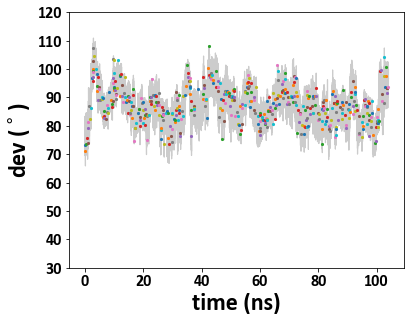

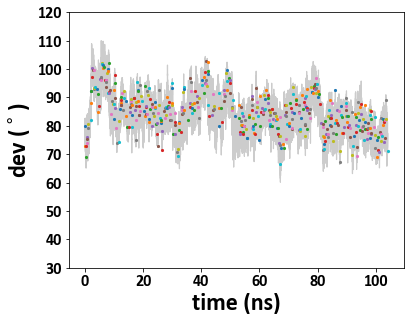

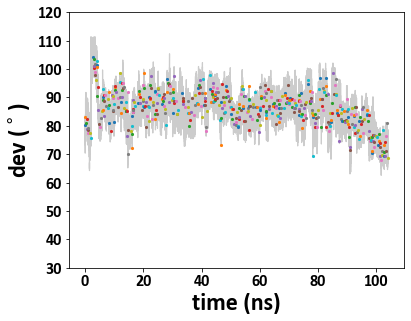

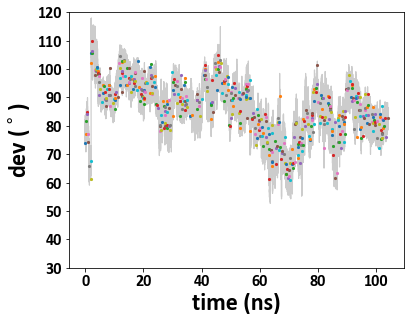

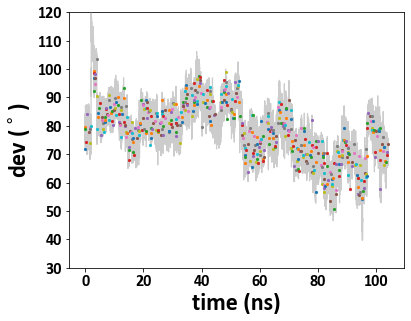

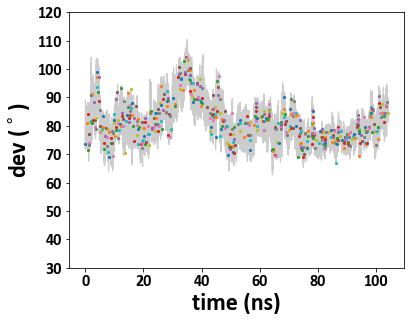

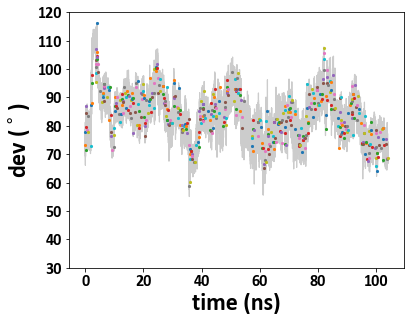

In [56]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np
import glob
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
dirname='/scratch/gpfs/hsinyu/linfengz/rid/trpcage.run03/'
itername=sorted(glob.glob(dirname+'iter.*'))

#for ii in [16]:
for ii in range(8,30):
    filename='model_dec%03d_run03.dat' %ii
    fig, ax = plt.subplots(figsize=(6,4.7))
    data = np.loadtxt(filename)
    time = np.arange(len(data))*0.002
    ax.plot(time,data,alpha=0.4,lw=1.2,zorder=10,c='gray')
    walker_name='%03d' %ii
    a=0
    for ite in itername[:-1]:
        index=np.loadtxt(ite+'/00.enhcMD/'+walker_name+'/cls.sel.out')
        #if isinstance(index, list):
        #print(index)
        if index.size>1:
            for ind in index:
                ax.scatter(time[int(ind+1001*a)],data[int(ind+1001*a)],s=4.5,zorder=20)
        elif index.size>0:
            ax.scatter(time[int(index+1001*a)],data[int(index+1001*a)],s=4.5,zorder=20)
        a+=1
    ax.set_ylabel(r'dev ($^\circ$)',fontproperties=font_prop)
    ax.set_xlabel('time (ns)',fontproperties=font_prop)
    plt.ylim(30,120)
    #plt.xlim(0,100)
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(16)
    plt.savefig('model_dec%03d.png' %ii,dpi=300,bbox_inches='tight')
    plt.show()

In [44]:
a=[1]

In [51]:
index.size

1

In [65]:
cd /scratch/gpfs/hsinyu/linfengz/rid/trpcage.run04/iter.000032/00.enhcMD/000

/scratch/gpfs/hsinyu/linfengz/rid/trpcage.run04/iter.000032/00.enhcMD/000


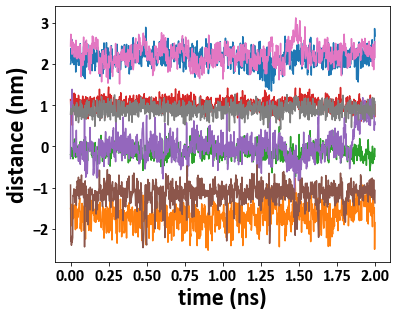

In [76]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)

data=np.loadtxt('plm.out')
data2=np.loadtxt('angle.rad.out')
fig, ax = plt.subplots(figsize=(6,4.7))
for i in range(0,8):
    ax.plot(data[:,0]/1000,data2[:,i])
ax.set_ylabel(r'distance (nm)',fontproperties=font_prop)
ax.set_xlabel(r'time (ns)',fontproperties=font_prop)
#plt.ylim(0,2)
#plt.xlim(25,55)
#ax.set_yticks(np.linspace(0,2,5))
#ax.set_yticklabels([0,0.5,1,2])
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
#plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.show()

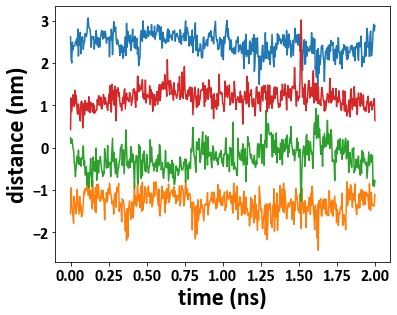

In [206]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)

data=np.loadtxt('/home/dongdong/SCR/trpcage.run05/iter.000002/00.enhcMD/000/plm.out')
fig, ax = plt.subplots(figsize=(6,4.7))
for i in range(16,20):
    ax.plot(data[:,0]/1000,data[:,i+1])
ax.set_ylabel(r'distance (nm)',fontproperties=font_prop)
ax.set_xlabel(r'time (ns)',fontproperties=font_prop)
#plt.ylim(0,2)
#plt.xlim(25,55)
#ax.set_yticks(np.linspace(0,2,5))
#ax.set_yticklabels([0,0.5,1,2])
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
#plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.show()

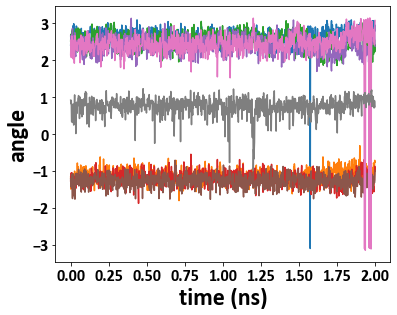

In [90]:
data=np.loadtxt('plm.out')
data2=np.loadtxt('angle.rad.out')
fig, ax = plt.subplots(figsize=(6,4.7))
for i in range(31,39):
    ax.plot(data[:,0]/1000,data[:,i])
ax.set_ylabel(r'angle',fontproperties=font_prop)
ax.set_xlabel(r'time (ns)',fontproperties=font_prop)
#plt.ylim(0,2)
#plt.xlim(25,55)
#ax.set_yticks(np.linspace(0,2,5))
#ax.set_yticklabels([0,0.5,1,2])
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
#plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.show()

In [84]:
np.sin(2.174342)

0.8233283934450862

In [85]:
np.cos(2.174342)

-0.5675652883564438

In [86]:
np.sin(-3.120444)

-0.021147077114356934

In [115]:
cd /home/dongdong/SCR/trpcage/analysis/run04

/scratch/gpfs/dongdong/trpcage/analysis/run04


In [118]:
bins=np.arange(-np.pi,np.pi,np.pi/50.0)

In [121]:
datao=np.loadtxt('/scratch/gpfs/hsinyu/linfengz/rid/trpcage.run04/iter.000030/00.enhcMD/000/plm.out')

In [124]:
alldata=[]
for i in range(len(bins)):
    temp=[]
    temp.append(bins[i])
    for j in range(2,len(datao[0])):
        temp.append(datao[0][j])
    alldata.append(temp)
np.savetxt('test.out',alldata)

0


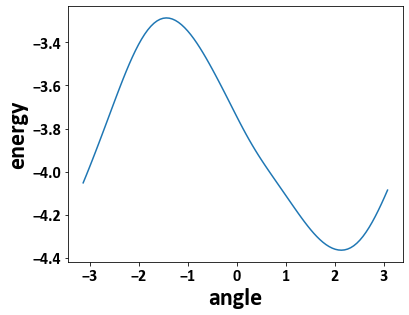

1


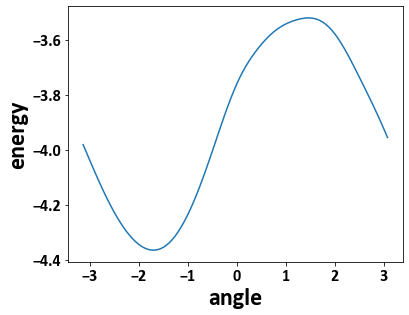

2


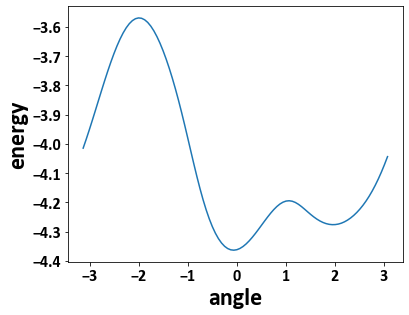

3


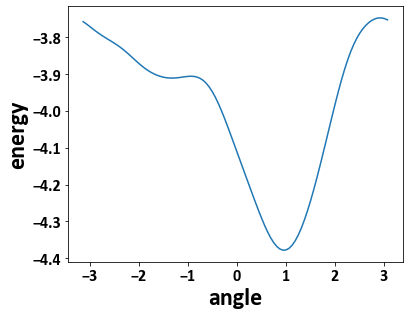

4


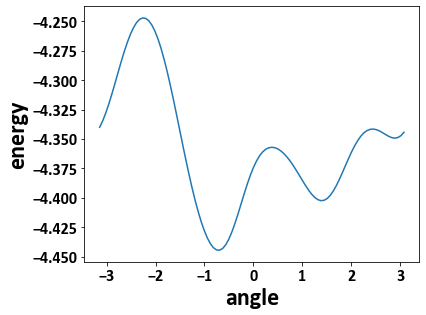

5


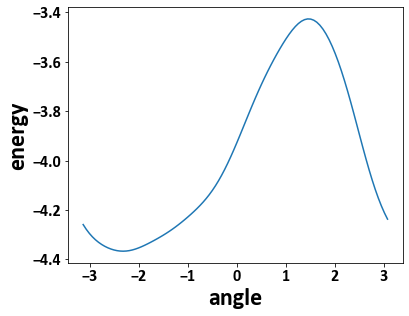

6


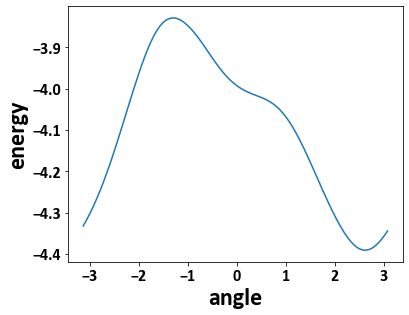

7


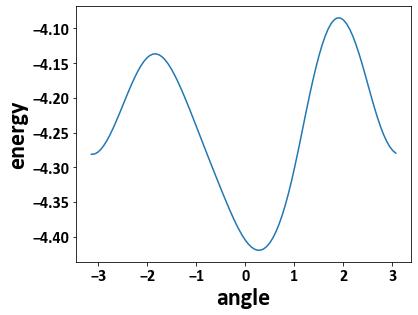

8


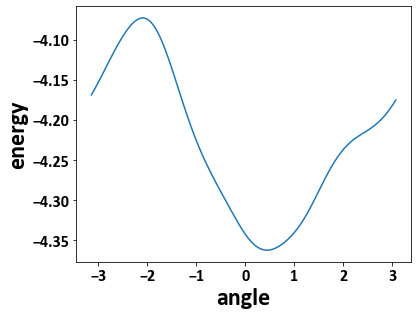

9


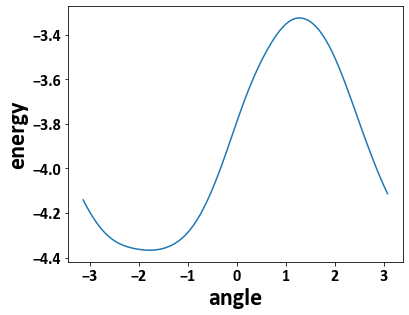

10


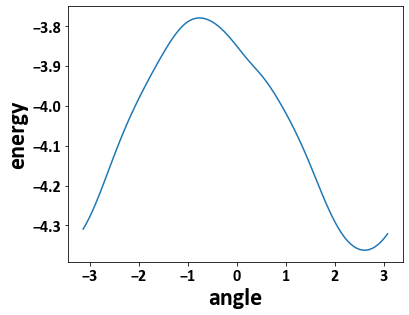

11


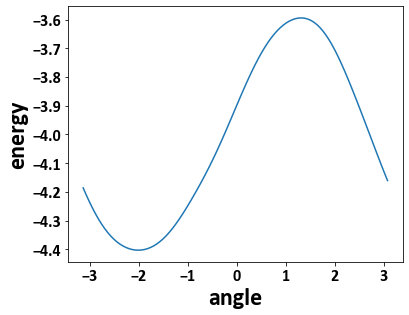

12


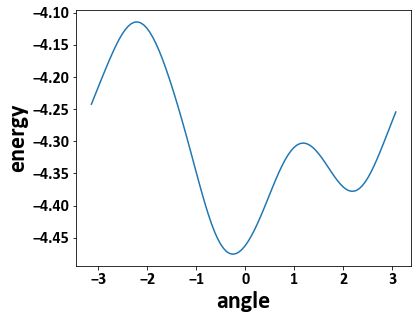

13


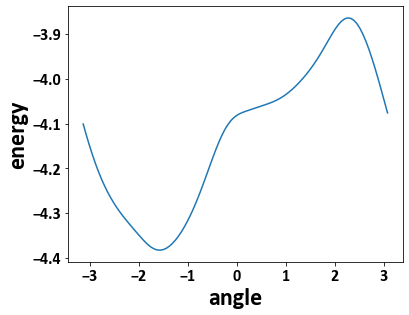

14


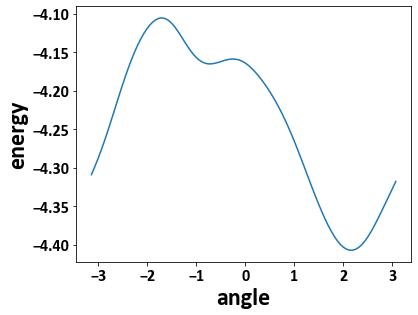

15


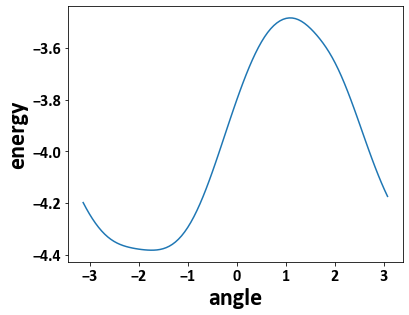

16


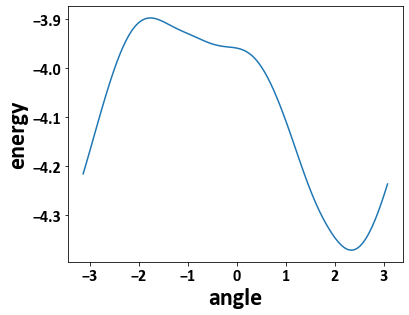

17


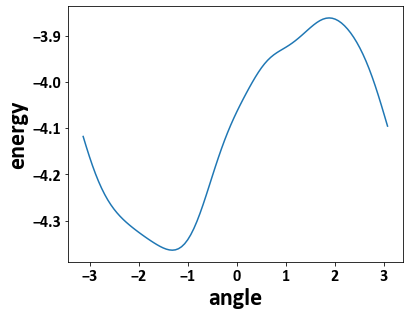

18


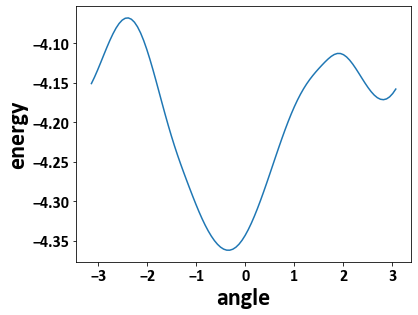

19


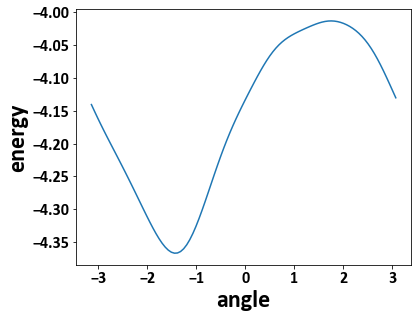

20


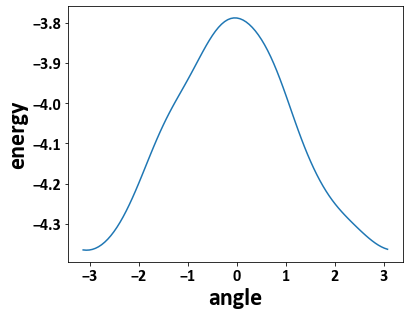

21


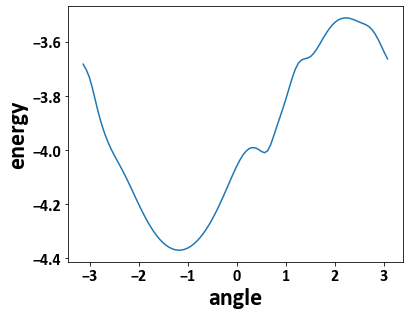

22


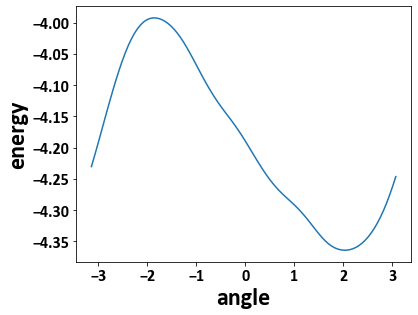

23


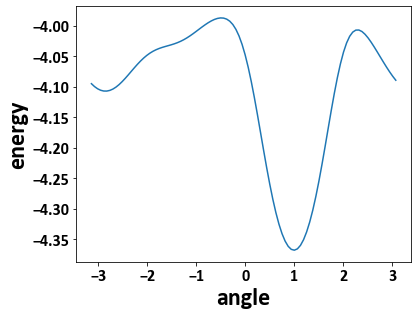

24


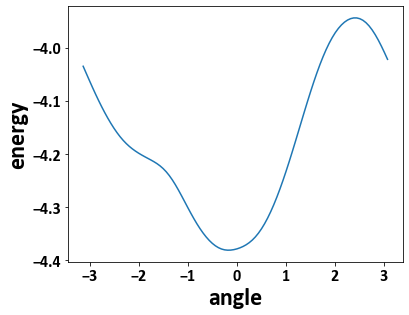

25


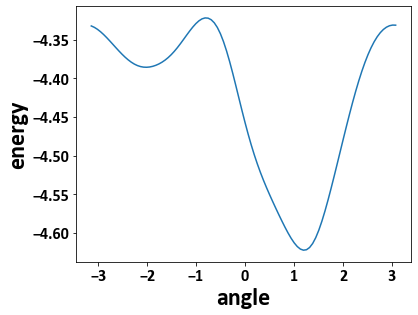

26


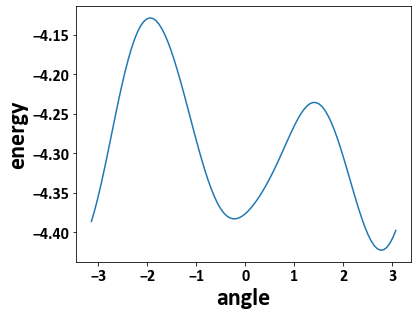

27


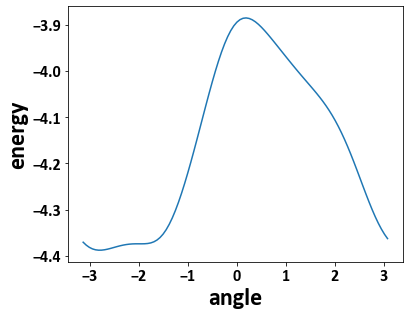

28


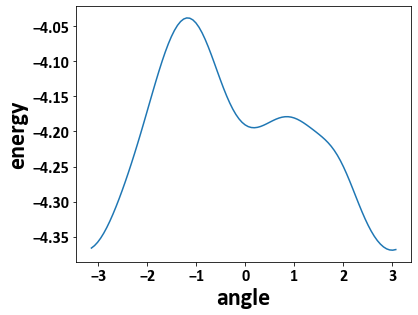

29


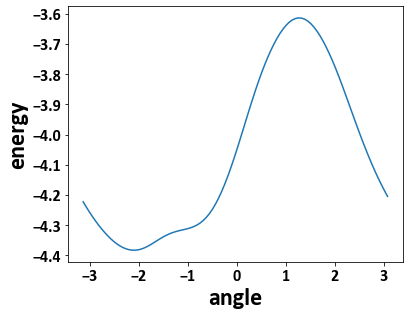

30


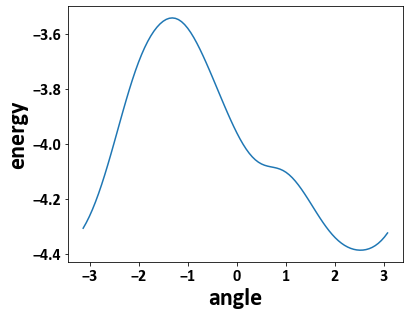

31


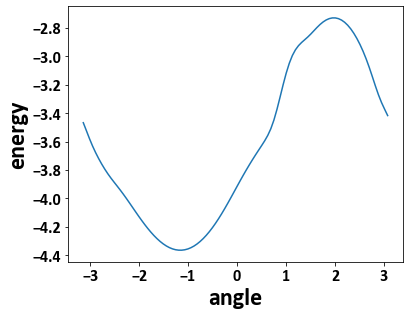

32


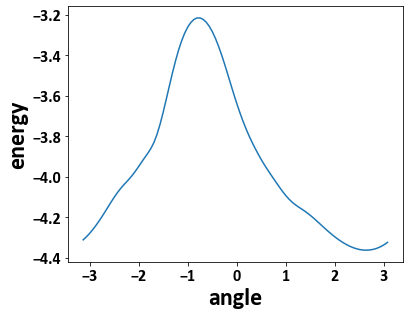

33


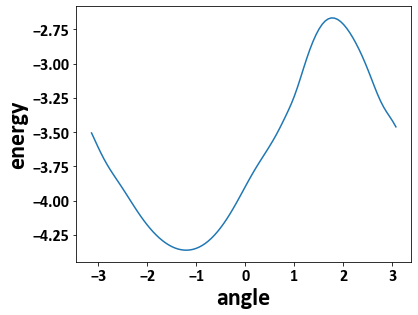

34


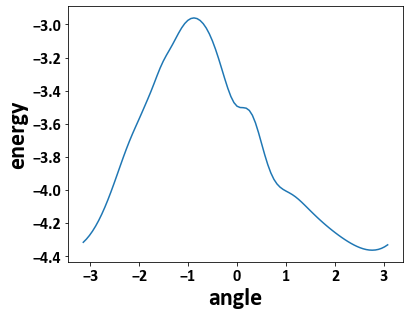

35


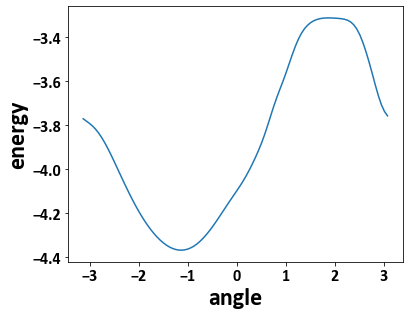

36


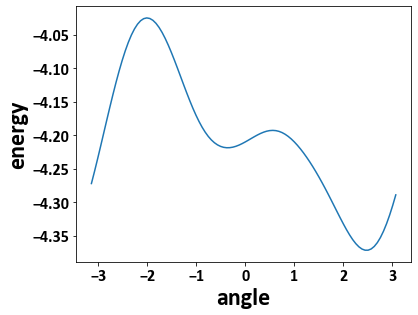

37


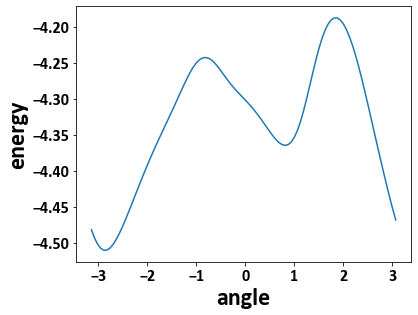

In [167]:
for i in range(38):
    data=np.loadtxt('/home/dongdong/SCR/trpcage/analysis/run04/energy.out%d' %i)
    print(i)
    fig, ax = plt.subplots(figsize=(6,4.7))
    ax.plot(bins,data)
    ax.set_ylabel(r'energy',fontproperties=font_prop)
    ax.set_xlabel(r'angle',fontproperties=font_prop)
    #plt.ylim(0,2)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(16)
    plt.savefig('test%d.png' %i,dpi=300,bbox_inches='tight')
    plt.show()

In [136]:
alldata=np.tile(datao[0][1:],(100,1))

In [149]:
for i in range(38):
    alldata=np.tile(datao[0][1:],(100,1))
    alldata[:,i]=bins
    np.savetxt('test.out%d' %i,alldata)

In [153]:
bins1=bins.repeat(100)

In [158]:
bins2=np.tile(bins,(1,100))

In [161]:
len(bins2[0])

10000

In [162]:
alldata=np.tile(datao[0][1:],(10000,1))

In [165]:
for i in range(18):
    alldata=np.tile(datao[0][1:],(10000,1))
    alldata[:,i*2+1]=bins1
    alldata[:,i*2+2]=bins2
    np.savetxt('two_test.out%d' %i, alldata)

In [168]:
datat=np.loadtxt('twao_energy.out0')
two_data=np.reshape(datat,(100,100))

In [169]:
two_data

array([[-3.60336856, -3.57562042, -3.5480845 , ..., -3.68305907,
        -3.65746217, -3.63079362],
       [-3.62838222, -3.60038292, -3.57253206, ..., -3.70852054,
        -3.68281695, -3.65600201],
       [-3.65461804, -3.62640835, -3.59828281, ..., -3.73507516,
        -3.70931002, -3.68239126],
       ...,
       [-3.53971032, -3.51291827, -3.48649777, ..., -3.61724627,
        -3.59227673, -3.56631655],
       [-3.55867325, -3.53153786, -3.50472972, ..., -3.63705253,
        -3.61182365, -3.58558563],
       [-3.58000133, -3.55254329, -3.52535821, ..., -3.65910498,
        -3.63366565, -3.60718953]])

0


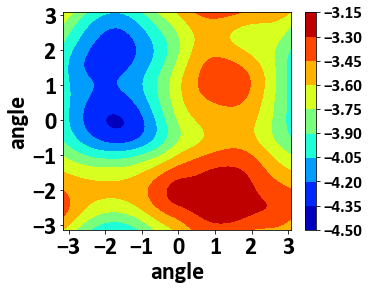

1


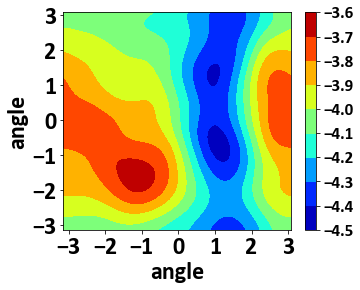

2


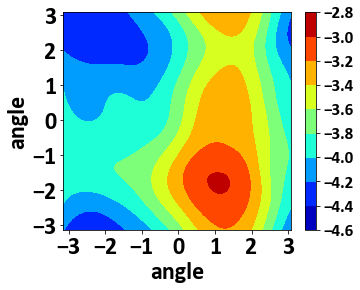

3


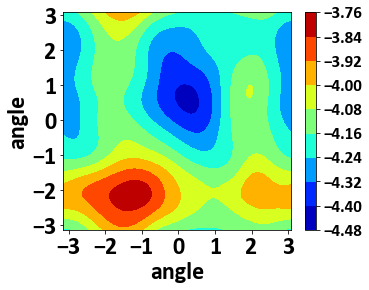

4


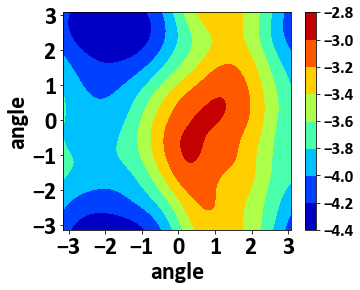

5


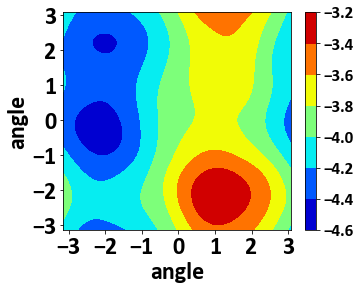

6


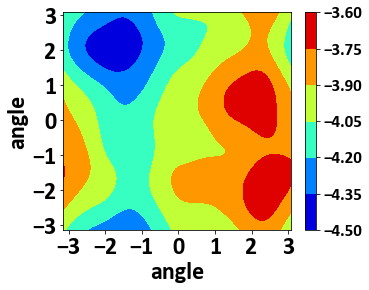

7


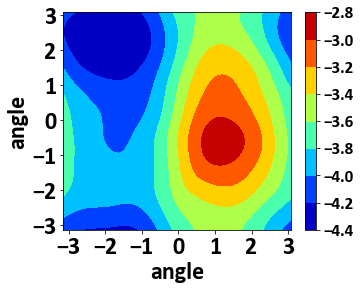

8


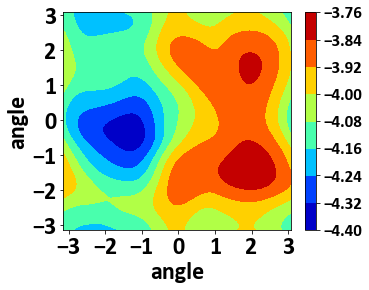

9


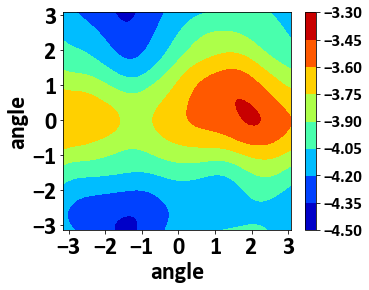

10


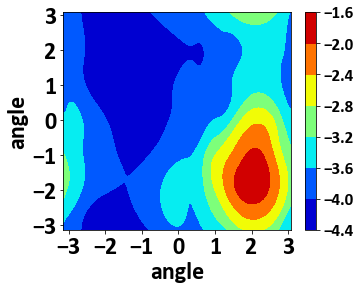

11


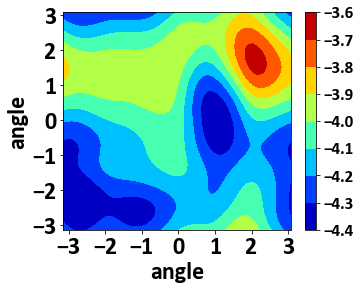

12


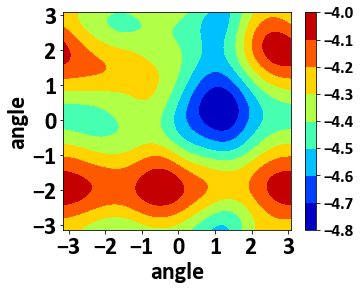

13


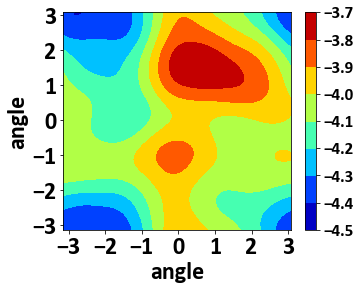

14


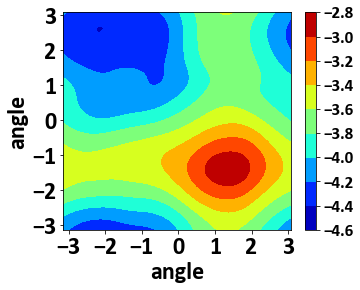

15


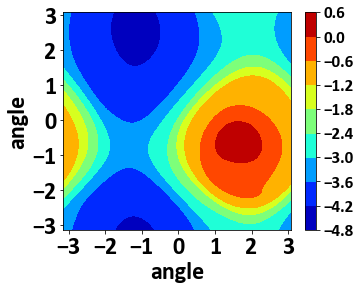

16


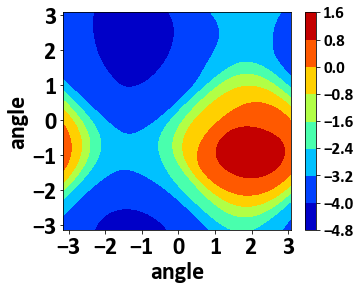

17


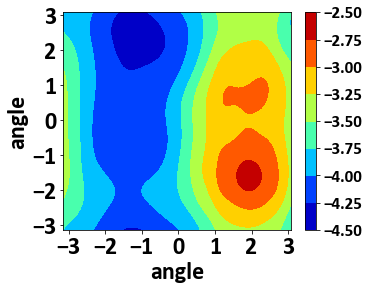

In [179]:
for i in range(18):
    print(i)
    datat=np.loadtxt('twao_energy.out%d' %i)
    fig = plt.figure(figsize=(5.1, 4))
    ax = fig.add_subplot(111)
    cmap = plt.cm.get_cmap("jet")
    #CS = plt.contourf(xedges[1:],yedges[1:],H,levels = np.linspace(0,1000000,11),cmap=cmap,extend="max")
    #lvls = np.logspace(0,3,15)
    #cmap.set_over("white")
    #CS = plt.contourf(bins,bins,np.reshape(datat,(100,100)),levels = np.linspace(0,6.5,14),cmap=cmap,extend="max")
    CS = plt.contourf(bins,bins,np.reshape(datat,(100,100)).T,cmap=cmap)
    cbar = plt.colorbar(CS)
    #plt.scatter(data_ave[:,0],data_ave[:,1],s=18)
    #plt.scatter(data_ave[:,0],data_ave[:,1],c=pcca,cmap='tab20c',s=14)
    #plt.errorbar(data_ave[:,2],data_ave[:,0],xerr=data_ave[:,3],yerr=data_ave[:,1],fmt=None)
    plt.xlabel(r'angle',fontproperties=font_prop)
    plt.ylabel(r'angle',fontproperties=font_prop)
    #plt.xlim(0,0.45)
    #plt.ylim(0,1)
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()+cbar.ax.get_yticklabels()):
        label.set_fontproperties(font_prop)
    for label in cbar.ax.get_yticklabels():
        label.set_fontproperties(leg_prop)
    plt.savefig('two_test%d.png' %i,dpi=600,bbox_inches='tight')
        #label.set_fontsize(16)
    #plt.imshow(HH, interpolation='nearest', origin='low',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],levels = np.linspace(1,6,20))
    plt.show()

In [180]:
datat=np.loadtxt('twao_energy.out13')

In [197]:
np.where(data13<-4.4)

(array([98, 98, 98, 99, 99, 99, 99]), array([5, 6, 7, 5, 6, 7, 8]))

In [185]:
data13=np.reshape(datat,(100,100)).T

In [187]:
data13

array([[-4.38186825, -4.38724008, -4.39152362, ..., -4.35860536,
        -4.36759706, -4.37533963],
       [-4.37803917, -4.38336162, -4.38768636, ..., -4.35544374,
        -4.36413255, -4.37165014],
       [-4.37273336, -4.37802582, -4.3824108 , ..., -4.35074727,
        -4.3591522 , -4.36646433],
       ...,
       [-4.38322722, -4.38892838, -4.39328138, ..., -4.35750703,
        -4.36754157, -4.3761119 ],
       [-4.38457585, -4.39013099, -4.39442126, ..., -4.35975969,
        -4.36942282, -4.37768869],
       [-4.38408823, -4.3895355 , -4.39380496, ..., -4.3600885 ,
        -4.36940436, -4.37739522]])

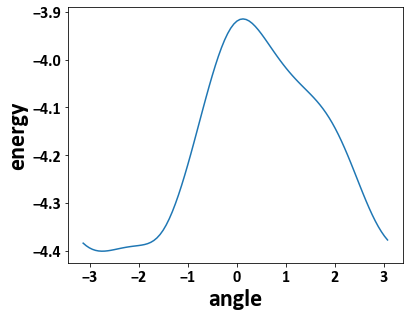

In [195]:
fig, ax = plt.subplots(figsize=(6,4.7))
ax.plot(bins,data13[-1])
ax.set_ylabel(r'energy',fontproperties=font_prop)
ax.set_xlabel(r'angle',fontproperties=font_prop)
#plt.ylim(0,2)
#plt.xlim(25,55)
#ax.set_yticks(np.linspace(0,2,5))
#ax.set_yticklabels([0,0.5,1,2])
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
#plt.savefig('test%d.png' %i,dpi=300,bbox_inches='tight')
plt.show()

In [191]:
datat14=np.loadtxt('twao_energy.out14')
data14=np.reshape(datat14,(100,100)).T

In [192]:
np.where(data14<-4.4)

(array([90, 90, 91, 91, 91, 92, 92, 92]),
 array([15, 16, 15, 16, 17, 15, 16, 17]))

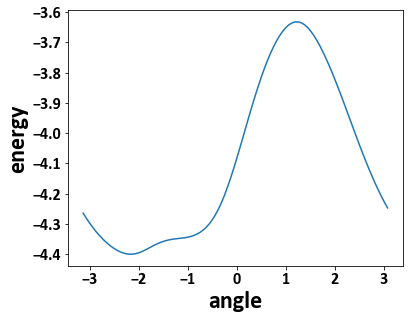

In [198]:
fig, ax = plt.subplots(figsize=(6,4.7))
ax.plot(bins,data14[90])
ax.set_ylabel(r'energy',fontproperties=font_prop)
ax.set_xlabel(r'angle',fontproperties=font_prop)
#plt.ylim(0,2)
#plt.xlim(25,55)
#ax.set_yticks(np.linspace(0,2,5))
#ax.set_yticklabels([0,0.5,1,2])
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
#plt.savefig('test%d.png' %i,dpi=300,bbox_inches='tight')
plt.show()

In [8]:
#!/usr/bin/env python3

import os,glob,shutil
import argparse
import numpy as np
import sklearn.cluster as cluster

cv_dih_dim = 38

def parse_cmd () :
    parser = argparse.ArgumentParser()
    parser.add_argument("-i","--idx-file", type=str, default = 'sel.out',
                        help="The sel idx files")
    parser.add_argument("-c","--cv-file", type=str, default = 'sel.angle.out',
                        help="The sel cv files")
    parser.add_argument("-t","--threshold", type=int, default = 0.3,
                        help="The number of clusters")
    parser.add_argument("--output-idx", type=str, default = 'cls.out',
                        help="The output cv idx")
    parser.add_argument("--output-cv", type=str, default = 'cls.angle.out',
                        help="The output cv value")
    args = parser.parse_args()
    return args

def cv_dist (a, b) :
    diff = a - b
    angle_pbc_range = len(diff)
    if cv_dih_dim is not None :
        angle_pbc_range = cv_dih_dim
    for ii in range(len(diff)) :
        value = diff[ii]
        if ii < angle_pbc_range :
            if value < -np.pi :
                value += 2 * np.pi
            elif value >= np.pi :
                value -= 2 * np.pi
        diff[ii] = value
    return np.linalg.norm(diff)

def mk_dist (cv) :
    nframe = cv.shape[0]
    dist = np.zeros([nframe, nframe])
    for ii in range(nframe) :
        for jj in range(ii+1, nframe) :
            dist[ii][jj] = cv_dist(cv[ii], cv[jj])
            dist[jj][ii] = dist[ii][jj]
    return dist

def mk_cluster (dist, distance_threshold) :
    cls = cluster.AgglomerativeClustering(n_clusters = None, 
                                          linkage='average', 
                                          affinity = 'precomputed',
                                          distance_threshold=distance_threshold)
    cls.fit(dist)
    return cls.labels_

def sel_from_cluster (angles, distance_threshold) :
    dist = mk_dist (angles)
    labels = mk_cluster (dist, distance_threshold)
    # make cluster map
    cls_map = []
    for ii in range(len(set(labels))) :
        cls_map.append([])
    for ii in range(len(labels)) :
        cls_idx = labels[ii]
        cls_map[cls_idx].append(ii)
    # randomly select from cluster
    cls_sel = []
    np.random.seed(seed = None)
    for ii in cls_map :
        _ret = np.random.choice(ii, 1)
        cls_sel.append (_ret[0])    
    cls_sel.sort()
    return cls_sel

def _main () :
    args = parse_cmd ()
    angidx = np.loadtxt (args.idx_file)
    angles = np.loadtxt (args.cv_file)    
    ncluster = args.numb_cls

    cls_sel = sel_from_cluster(angles, distance_threshold)
    
    np.savetxt(args.output_idx, angidx[cls_sel], fmt = '%d')
    np.savetxt(args.output_cv,  angles[cls_sel], fmt = '%.6f')



0


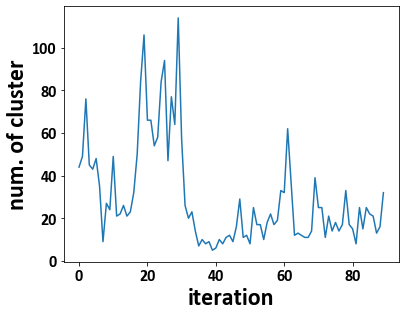

1


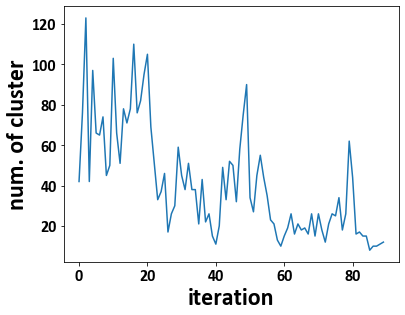

2


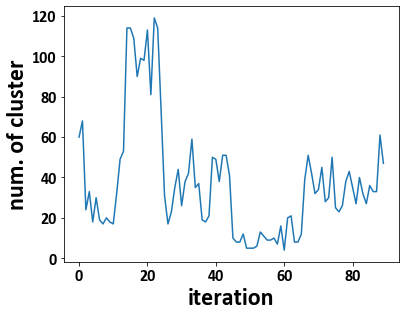

3


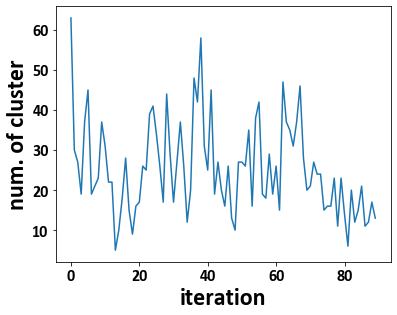

4


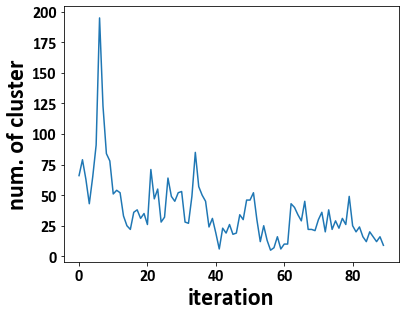

5


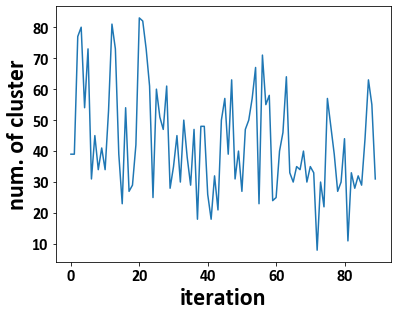

6


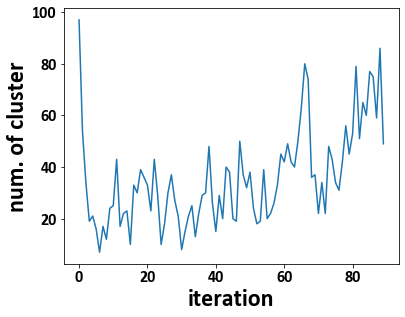

7


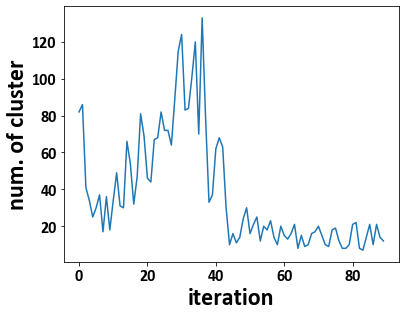

8


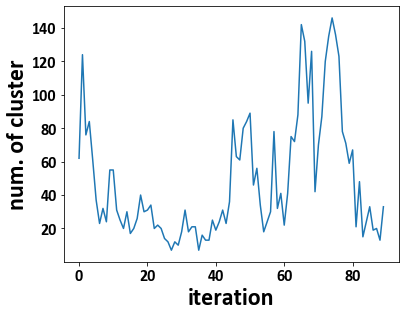

9


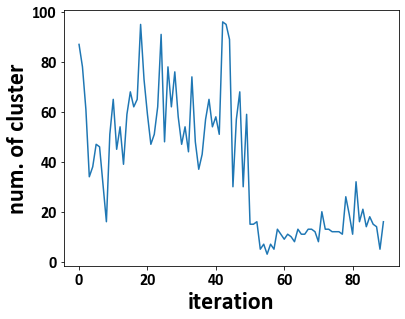

10


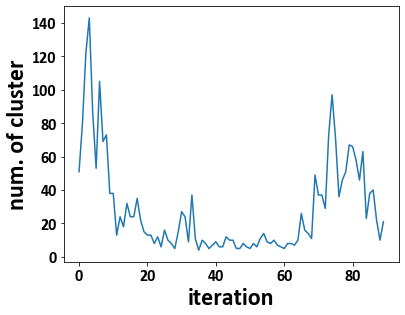

11


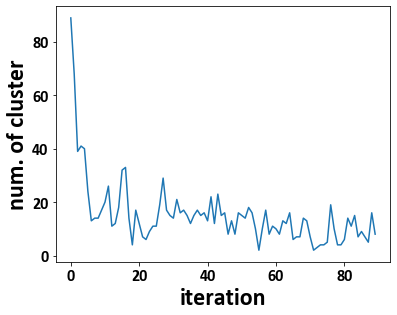

12


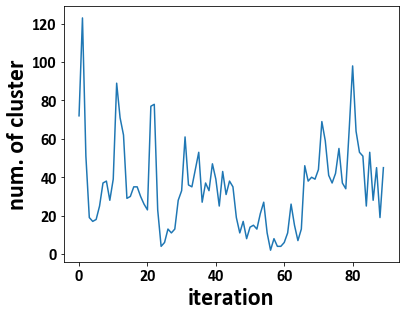

13


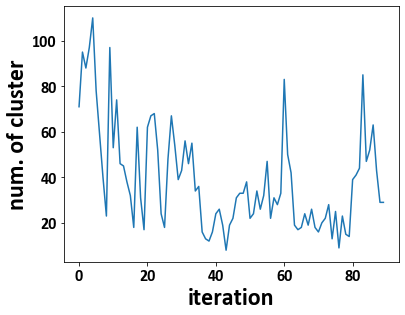

14


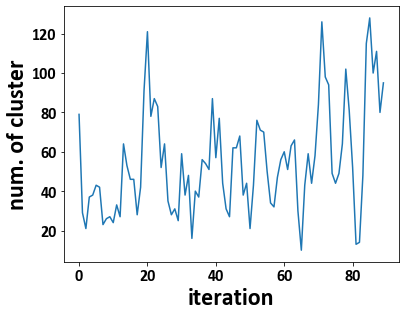

15


In [ ]:
all_cl=[]
for wa in range(30):
    print(wa)
    temp_cl=[]
    for it in range(90):
        filename='/scratch/gpfs/hsinyu/linfengz/rid/trpcage.run02/iter.%06d/00.enhcMD/%03d/sel.angle.out' %(it,wa)
        sel_angles=np.loadtxt(filename)
        cls_sel = sel_from_cluster (sel_angles, 2.5)
        temp_cl.append(len(set(cls_sel)))
    np.savetxt('/home/dongdong/SCR/trpcage/analysis/run02/cluster/w%d_clu.dat' %wa, temp_cl)
    fig, ax = plt.subplots(figsize=(6,4.7))
    ax.plot(range(len(temp_cl)),temp_cl)
    ax.set_ylabel(r'num. of cluster',fontproperties=font_prop)
    ax.set_xlabel(r'iteration',fontproperties=font_prop)
    #plt.ylim(0,2)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(16)
    plt.savefig('/home/dongdong/SCR/trpcage/analysis/run02/cluster/w%d_clu.png' %wa,dpi=300,bbox_inches='tight')
    plt.show()

15


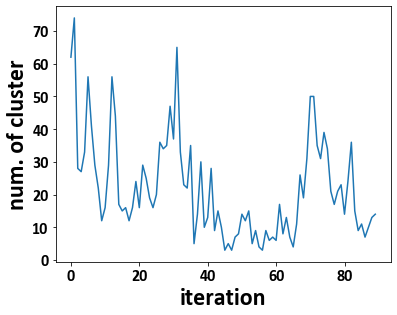

16


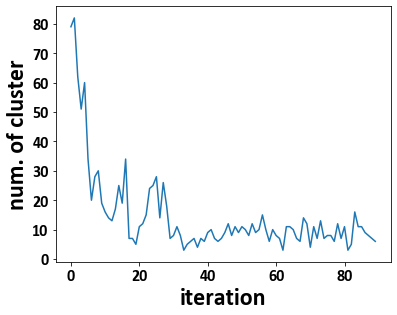

17


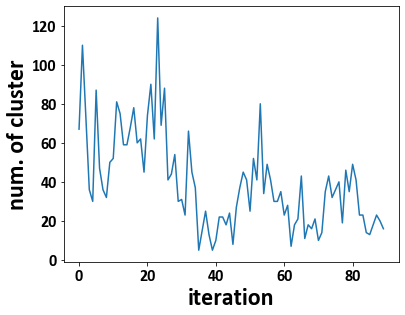

18


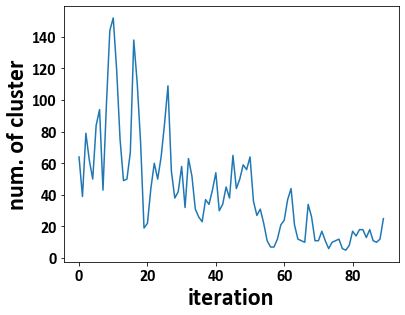

19


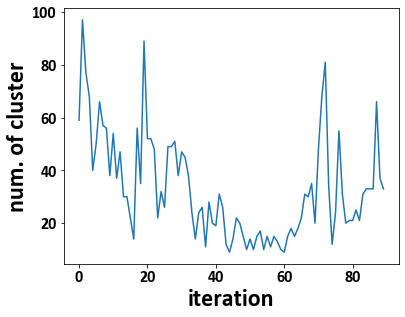

20


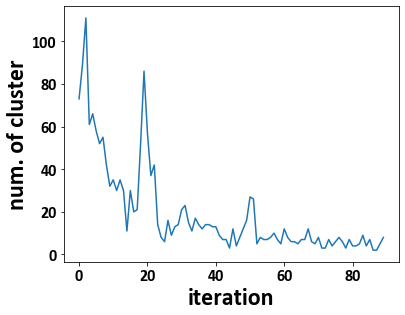

21


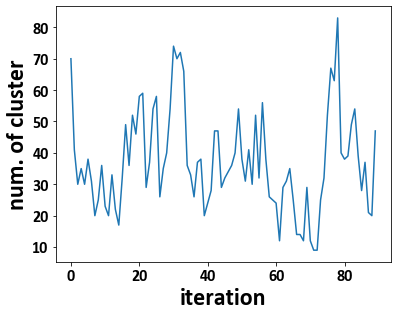

22


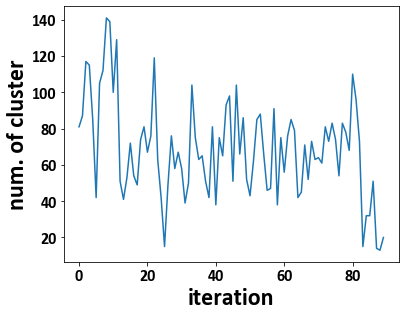

23


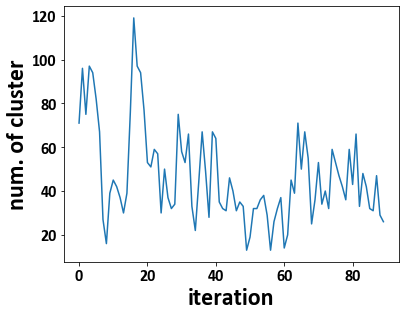

24


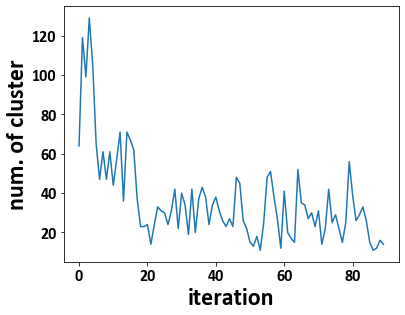

25


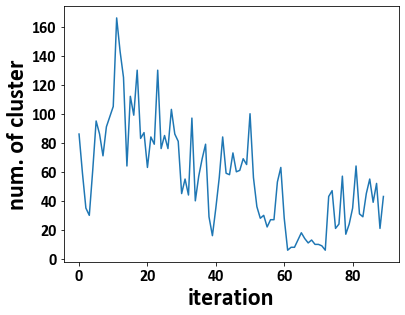

26


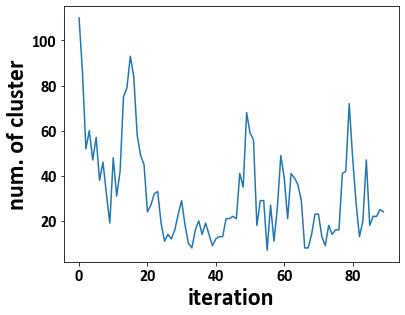

27


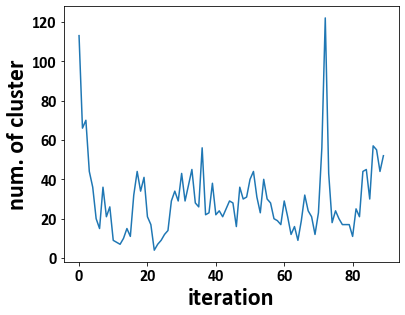

28


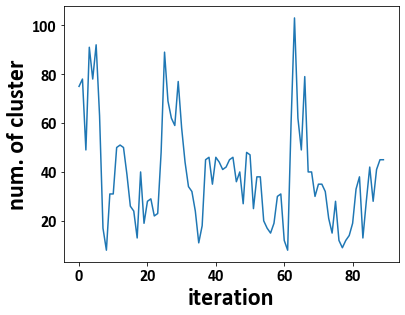

29


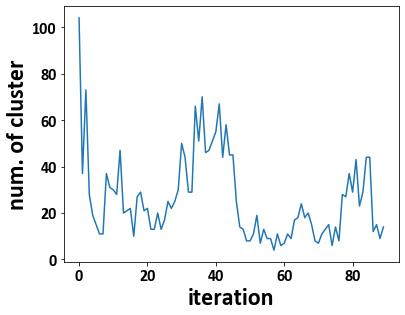

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
all_cl=[]
for wa in range(15,30):
    print(wa)
    temp_cl=[]
    for it in range(90):
        filename='/scratch/gpfs/hsinyu/linfengz/rid/trpcage.run02/iter.%06d/00.enhcMD/%03d/sel.angle.out' %(it,wa)
        sel_angles=np.loadtxt(filename)
        cls_sel = sel_from_cluster (sel_angles, 2.5)
        temp_cl.append(len(set(cls_sel)))
    np.savetxt('/home/dongdong/SCR/trpcage/analysis/run02/cluster/w%d_clu.dat' %wa, temp_cl)
    fig, ax = plt.subplots(figsize=(6,4.7))
    ax.plot(range(len(temp_cl)),temp_cl)
    ax.set_ylabel(r'num. of cluster',fontproperties=font_prop)
    ax.set_xlabel(r'iteration',fontproperties=font_prop)
    #plt.ylim(0,2)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(16)
    plt.savefig('/home/dongdong/SCR/trpcage/analysis/run02/cluster/w%d_clu.png' %wa,dpi=300,bbox_inches='tight')
    plt.show()

23
[12 12 12 ... 11 11 11]


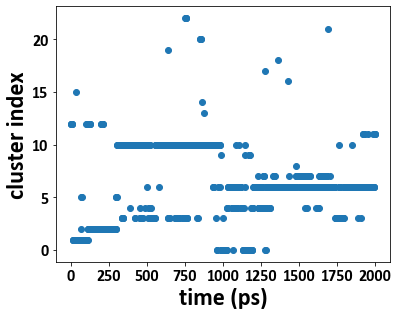

42
[ 5  5  5 ...  7 26 26]


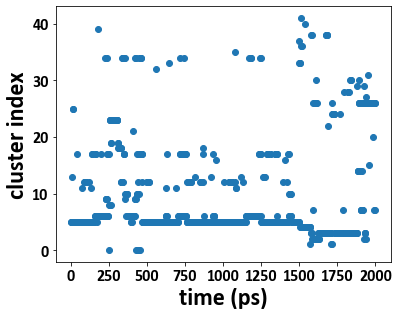

4
[0 2 2 ... 0 0 0]


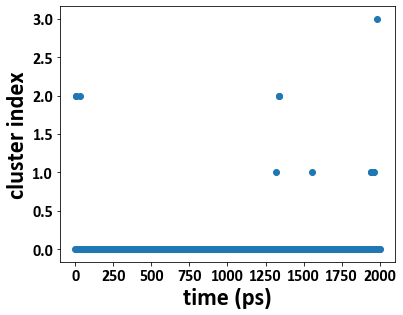

11
[3 3 3 ... 9 2 2]


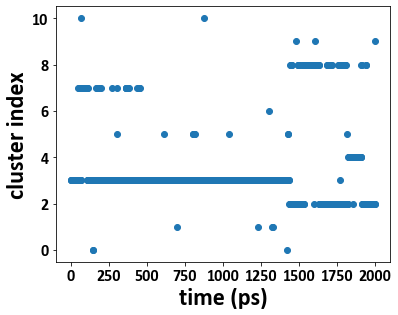

4
[2 2 2 ... 2 2 2]


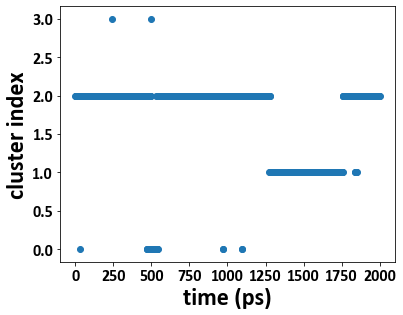

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
for ii in [2,5,11,16,20]:
    data=np.loadtxt('/home/dongdong/SCR/trpcage/iter.000080/00.enhcMD/%03d-t/plm.out' %ii)
    dist=mk_dist(data[:,1:])
    cls_sel = mk_cluster (dist, 2.5)
    print(len(set(cls_sel)))
    print(cls_sel)
    fig, ax = plt.subplots(figsize=(6,4.7))
    ax.scatter(np.array(range(len(cls_sel)))*2,cls_sel)
    ax.set_ylabel(r'cluster index',fontproperties=font_prop)
    ax.set_xlabel(r'time (ps)',fontproperties=font_prop)
    #plt.ylim(0,2)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(16)
    plt.show()

5
[1 1 1 ... 0 0 0]


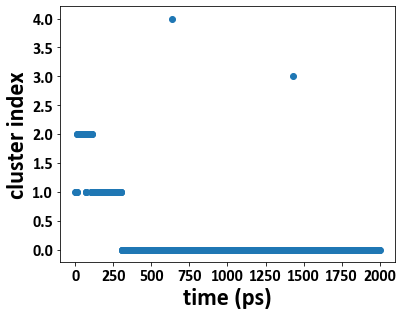

10
[4 4 4 ... 8 1 1]


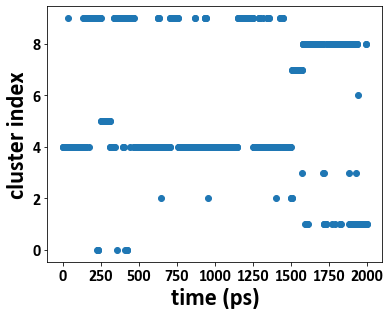

3
[0 2 2 ... 0 0 0]


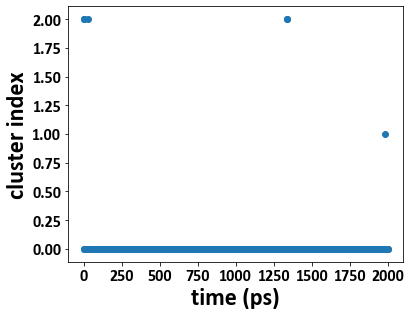

3
[0 0 0 ... 2 1 1]


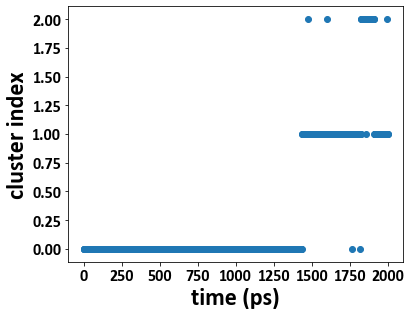

2
[0 0 0 ... 0 0 0]


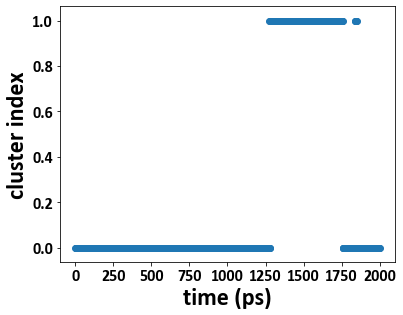

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
for ii in [2,5,11,16,20]:
    data=np.loadtxt('/home/dongdong/SCR/trpcage/iter.000080/00.enhcMD/%03d-t/plm.out' %ii)
    dist=mk_dist(data[:,1:])
    cls_sel = mk_cluster (dist, 3)
    print(len(set(cls_sel)))
    print(cls_sel)
    fig, ax = plt.subplots(figsize=(6,4.7))
    ax.scatter(np.array(range(len(cls_sel)))*2,cls_sel)
    ax.set_ylabel(r'cluster index',fontproperties=font_prop)
    ax.set_xlabel(r'time (ps)',fontproperties=font_prop)
    #plt.ylim(0,2)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(16)
    plt.show()

In [82]:
data=np.loadtxt('/home/dongdong/SCR/trpcage/iter.000080/00.enhcMD/005-t/plm.out')
cls_sel = sel_from_cluster (data[:,1:], 2.5)
print(len(set(cls_sel)))

42


In [83]:
data=np.loadtxt('/home/dongdong/SCR/trpcage/iter.000080/00.enhcMD/011-t/plm.out')
cls_sel = sel_from_cluster (data[:,1:], 2.5)
print(len(set(cls_sel)))

4


2002
8
[1 1 1 ... 0 0 0]


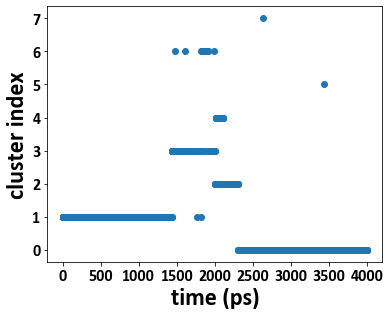

In [7]:
data1=np.loadtxt('/home/dongdong/SCR/trpcage/iter.000080/00.enhcMD/016-t/plm.out')
data2=np.loadtxt('/home/dongdong/SCR/trpcage/iter.000080/00.enhcMD/002-t/plm.out')
newdata=np.vstack((data1[:,1:],data2[:,1:]))
print(len(newdata))
dist=mk_dist(newdata)
cls_sel = mk_cluster (dist, 3)
print(len(set(cls_sel)))
print(cls_sel)
fig, ax = plt.subplots(figsize=(6,4.7))
ax.scatter(np.array(range(len(cls_sel)))*2,cls_sel)
ax.set_ylabel(r'cluster index',fontproperties=font_prop)
ax.set_xlabel(r'time (ps)',fontproperties=font_prop)
#plt.ylim(0,2)
#plt.xlim(25,55)
#ax.set_yticks(np.linspace(0,2,5))
#ax.set_yticklabels([0,0.5,1,2])
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.show()

In [85]:
data=np.loadtxt('/home/dongdong/SCR/trpcage/iter.000080/00.enhcMD/020-t/plm.out')
cls_sel = sel_from_cluster (data[:,1:], 2.5)
print(len(set(cls_sel)))

4


In [88]:
data=np.loadtxt('/home/dongdong/SCR/trpcage/iter.000080/00.enhcMD/002-t/plm.out')
dist= mk_dist (data[:,1:])
print(np.min(dist.nonzero()),np.mean(dist),np.max(dist))

0 3.212053858947043 6.477377986481893


In [89]:
data=np.loadtxt('/home/dongdong/SCR/trpcage/iter.000080/00.enhcMD/005-t/plm.out')
dist= mk_dist (data[:,1:])
print(np.min(dist),np.mean(dist),np.max(dist))

0.0 3.745354555660772 6.719666395872143


In [90]:
data=np.loadtxt('/home/dongdong/SCR/trpcage/iter.000080/00.enhcMD/011-t/plm.out')
dist= mk_dist (data[:,1:])
print(np.min(dist),np.mean(dist),np.max(dist))

0.0 2.072321559437132 4.68897255690519


In [91]:
data=np.loadtxt('/home/dongdong/SCR/trpcage/iter.000080/00.enhcMD/016-t/plm.out')
dist= mk_dist (data[:,1:])
print(np.min(dist),np.mean(dist),np.max(dist))

0.0 3.0118525681724417 5.97742856347773


In [92]:
data=np.loadtxt('/home/dongdong/SCR/trpcage/iter.000080/00.enhcMD/020-t/plm.out')
dist= mk_dist (data[:,1:])
print(np.min(dist),np.mean(dist),np.max(dist))

0.0 2.599134591627158 5.197260977987464


In [16]:
data=np.loadtxt('/scratch/gpfs/hsinyu/linfengz/rid/trpcage.run02/iter.000040/00.enhcMD/016/sel.angle.out')
from sklearn.decomposition import PCA
pca = PCA(n_components=38)
pca.fit(data)
print(pca.explained_variance_ratio_)

[0.25329442 0.21729473 0.08993879 0.05596359 0.04686721 0.04296236
 0.04004384 0.03959692 0.03654838 0.02495327 0.01420381 0.013437
 0.01200668 0.01098081 0.0098266  0.00856113 0.00829444 0.00750865
 0.00722377 0.00689334 0.00633665 0.00586789 0.00553033 0.00520055
 0.00487007 0.00456603 0.00414623 0.00324321 0.00289794 0.00250594
 0.00218223 0.00171082 0.00134308 0.00114396 0.00090863 0.00055987
 0.00032386 0.00026296]


In [55]:
def cossin(data):
    alldata=[]
    for dd in data:
        temp=[]
        for d in dd:
            temp.append(np.cos(d))
            temp.append(np.sin(d))
        alldata.append(temp)
    return np.array(alldata)

In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
for it in range(90):
    data=np.loadtxt('/scratch/gpfs/hsinyu/linfengz/rid/trpcage.run02/iter.%06d/00.enhcMD/023/sel.angle.out' %it)
    newdata=cossin(data)
    #X_scaler = RobustScaler()
    #newdata = X_scaler.fit_transform(newdata)
    
    pca = PCA(n_components=38)
    pca.fit(newdata)
    pca_ratio=pca.explained_variance_ratio_
    print(np.sum(pca_ratio[0:16]))

0.8398032523826179
0.8488339264588072
0.8170368937277911
0.7889498823218831
0.7596747054986996
0.7854569936004643
0.8303396338385525
0.8157070268926871
0.7608732849133515
0.7892448422324514
0.788234748988806
0.7744468248122625
0.7961427314172391
0.764498069840349
0.8222415262611539
0.844904303538289
0.8155359306335128
0.8001569349996793
0.8200675432568522
0.8290577287263414
0.8242635151278115
0.8534051450661234
0.8312577318201614
0.8321690695220156
0.761362489681294
0.8168390618607655
0.804684620907267
0.8087688269446072
0.8539061606210894
0.8328621536458594
0.8590528267234325
0.8523991196165468
0.8192145304739153
0.8376669603271751
0.7618217967991616
0.8361634898297754
0.8583137431635623
0.8299643036242993
0.7738002021334894
0.8238670871159645
0.830324128963615
0.8487939811555326
0.8539875264925093
0.8356641960584964
0.8323928690735245
0.8230532342383354
0.8145224890780103
0.8355648406219883
0.828810052125687
0.8101650253005529
0.7864873335334563
0.8384621475911878
0.8208171938310821


TypeError: not all arguments converted during string formatting

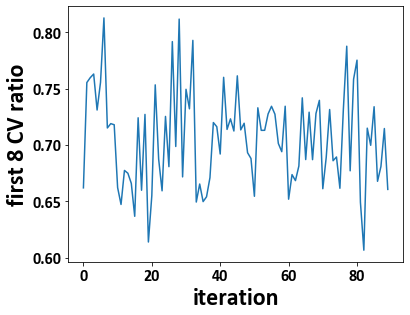

In [69]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
alldata=[]
for it in range(90):
    data=np.loadtxt('/scratch/gpfs/hsinyu/linfengz/rid/trpcage.run02/iter.%06d/00.enhcMD/016/sel.angle.out' %it)
    newdata=cossin(data)
    #X_scaler = RobustScaler()
    #newdata = X_scaler.fit_transform(newdata)
    
    pca = PCA(n_components=38)
    pca.fit(newdata)
    pca_ratio=pca.explained_variance_ratio_
    alldata.append(np.sum(pca_ratio[0:10]))
alldata=np.array(alldata)
fig, ax = plt.subplots(figsize=(6,4.7))
ax.plot(range(len(alldata)),alldata)
ax.set_ylabel(r'first 8 CV ratio',fontproperties=font_prop)
ax.set_xlabel(r'iteration',fontproperties=font_prop)
#plt.ylim(0,2)
#plt.xlim(25,55)
#ax.set_yticks(np.linspace(0,2,5))
#ax.set_yticklabels([0,0.5,1,2])
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
#plt.savefig('/home/dongdong/SCR/trpcage/analysis/run02/cluster/pca16.png' %wa,dpi=300,bbox_inches='tight')
plt.show()

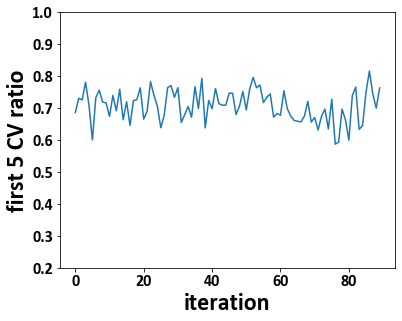

In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
alldata=[]
for it in range(90):
    data=np.loadtxt('/scratch/gpfs/hsinyu/linfengz/rid/trpcage.run02/iter.%06d/00.enhcMD/022/sel.angle.out' %it)
    newdata=cossin(data)
    #X_scaler = RobustScaler()
    #newdata = X_scaler.fit_transform(newdata)
    
    pca = PCA(n_components=38)
    pca.fit(newdata)
    pca_ratio=pca.explained_variance_ratio_
    alldata.append(np.sum(pca_ratio[0:10]))
alldata=np.array(alldata)
fig, ax = plt.subplots(figsize=(6,4.7))
ax.plot(range(len(alldata)),alldata)
ax.set_ylabel(r'first 5 CV ratio',fontproperties=font_prop)
ax.set_xlabel(r'iteration',fontproperties=font_prop)
plt.ylim(0.2,1)
#plt.xlim(25,55)
#ax.set_yticks(np.linspace(0,2,5))
#ax.set_yticklabels([0,0.5,1,2])
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
#plt.savefig('/home/dongdong/SCR/trpcage/analysis/run02/cluster/pca16.png' %wa,dpi=300,bbox_inches='tight')
plt.show()

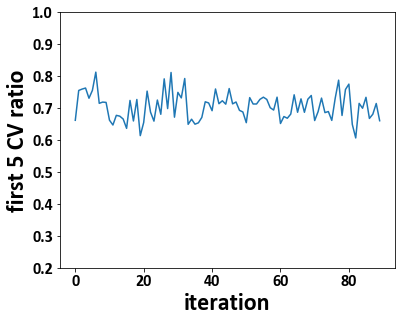

In [73]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
alldata=[]
for it in range(90):
    data=np.loadtxt('/scratch/gpfs/hsinyu/linfengz/rid/trpcage.run02/iter.%06d/00.enhcMD/016/sel.angle.out' %it)
    newdata=cossin(data)
    #X_scaler = RobustScaler()
    #newdata = X_scaler.fit_transform(newdata)
    
    pca = PCA(n_components=38)
    pca.fit(newdata)
    pca_ratio=pca.explained_variance_ratio_
    alldata.append(np.sum(pca_ratio[0:10]))
alldata=np.array(alldata)
fig, ax = plt.subplots(figsize=(6,4.7))
ax.plot(range(len(alldata)),alldata)
ax.set_ylabel(r'first 5 CV ratio',fontproperties=font_prop)
ax.set_xlabel(r'iteration',fontproperties=font_prop)
plt.ylim(0.2,1)
#plt.xlim(25,55)
#ax.set_yticks(np.linspace(0,2,5))
#ax.set_yticklabels([0,0.5,1,2])
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
#plt.savefig('/home/dongdong/SCR/trpcage/analysis/run02/cluster/pca16.png' %wa,dpi=300,bbox_inches='tight')
plt.show()

In [46]:
data1=np.loadtxt('/scratch/gpfs/hsinyu/linfengz/rid/trpcage.run02/iter.000089/00.enhcMD/000/sel.angle.out')

In [47]:
X_scaler = StandardScaler()
data = X_scaler.fit_transform(np.sin(data1),np.cos(data1))

In [50]:
len(data1[0])

38

In [51]:
len(data[0])

38

In [52]:
data[0]

array([ 1.34117775, -0.65460626,  0.38052612, -0.78892959,  1.16388565,
        1.18073017, -0.29198452,  0.05180629,  0.49353166,  0.53211414,
       -0.35251933, -1.7923184 ,  1.37388775, -0.77131678,  0.39579801,
       -0.17383307,  0.78556097,  0.40607143, -1.18529326, -1.91324591,
       -1.42384147,  1.88838597, -1.79274155, -0.68410034,  0.43539821,
       -0.628237  ,  1.95849852,  1.26810931,  1.65736835, -0.4094533 ,
        0.01289514,  0.11812915,  0.60700443, -0.54842884, -0.80612716,
       -0.13859591, -0.63541732, -0.84054981])

In [53]:
data1[0]

array([ 1.617852, -1.509504,  2.222068, -1.604554,  2.533492, -1.043163,
       -0.131136, -2.457585,  2.552382,  1.018048,  0.28855 ,  0.706036,
        0.955672, -1.477715,  2.518586, -1.81514 ,  1.732541,  2.405079,
       -2.124091, -2.148663, -2.803971, -0.850926, -0.737878, -1.643873,
        0.122512, -1.610557,  2.518126, -1.111815,  2.888886, -1.338413,
        2.643502, -1.0996  ,  2.594109, -1.229669,  2.833958, -1.162431,
        2.814991, -1.374652])

In [74]:
import os

In [78]:
for i in range(30):
    if os.path.exists('/home/dongdong/SCR/trpcage.run05/iter.000004/00.enhcMD/%03d/tag_finished' %i)==False:
        print(i)

19
